In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import glob
import pandas as pd
import cmocean as cm

# Question 1

In [2]:
mylist = [f for f in glob.glob("GW*.nc")]
print(mylist)

datelist = ['201401180529','201401240631']

['GW1AM2_201401240631_012D_L1SGRTBR_2210210.nc', 'GW1AM2_201401280606_008D_L1SGRTBR_2210210.nc']


In [3]:
latmax=52
latmin=45
lonmax=-58
lonmin=-70

In [4]:
# first for the 24th
data = xr.open_dataset(mylist[0], decode_times=False)

In [5]:
# *note:multiply all the brightness temperatures by 0.01 to get into K

d = {'lat':data.lat.values.flatten('C'), 'lon':data.lon.values.flatten('C'), 
     'H36':data.Brightness_Temperature__res36_36_5GHz_H_.values.flatten('C'), 'H6':data.Brightness_Temperature__res06_6_9GHz_H_.values.flatten('C'), 'H19':data.Brightness_Temperature__res10_18_7GHz_H_.values.flatten('C'),
     'V36':data.Brightness_Temperature__res36_36_5GHz_V_.values.flatten('C'), 'V6':data.Brightness_Temperature__res06_6_9GHz_V_.values.flatten('C'), 'V19':data.Brightness_Temperature__res10_18_7GHz_V_.values.flatten('C'),
     'land6':data.Land_Ocean_Flag_6_to_36[0,:,:].values.flatten('C'), 'land19':data.Land_Ocean_Flag_6_to_36[2,:,:].values.flatten('C'), 'land36':data.Land_Ocean_Flag_6_to_36[3,:,:].values.flatten('C'),
    }
df24 = pd.DataFrame(data=d)
df24 = df24[(df24['lat'] < latmax ) & (df24['lat'] > latmin) & (df24['lon'] < lonmax) & (df24['lon'] > lonmin)]
df24 = df24.reset_index(drop=True)
df24

,lat,lon,H36,H6,H19,V36,V6,V19,land6,land19,land36
0,51.992413,-65.035393,218.889995,235.549995,228.719995,231.889995,247.189994,243.969995,100.0,100.0,100.0
1,51.983360,-64.904175,217.999995,236.179995,229.609995,227.819995,247.599994,243.519995,100.0,100.0,100.0
2,51.975086,-64.772842,217.389995,237.269995,230.469995,224.039995,248.409994,243.719995,100.0,100.0,100.0
3,51.967503,-64.641449,215.939995,238.469995,231.059995,225.379995,249.469994,244.679995,100.0,100.0,100.0
4,51.960533,-64.509972,212.709995,239.339995,231.339995,222.799995,250.599994,245.779995,100.0,100.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...
9177,45.139359,-59.241055,149.089997,84.259998,109.059998,210.759995,160.749996,185.899996,0.0,0.0,0.0
9178,45.206501,-59.176224,147.799997,84.479998,109.179998,210.949995,160.749996,185.929996,0.0,0.0,0.0
9179,45.057751,-59.286270,146.769997,84.079998,108.639998,210.269995,160.759996,185.799996,0.0,0.0,0.0
9180,45.124958,-59.221642,148.979997,84.279998,109.069998,211.019995,160.769996,185.899996,0.0,0.0,0.0


In [6]:
# now with the 28th
data = xr.open_dataset(mylist[1], decode_times=False)
d = {'lat':data.lat.values.flatten('C'), 'lon':data.lon.values.flatten('C'), 
     'H36':data.Brightness_Temperature__res36_36_5GHz_H_.values.flatten('C'), 'H6':data.Brightness_Temperature__res06_6_9GHz_H_.values.flatten('C'), 'H19':data.Brightness_Temperature__res10_18_7GHz_H_.values.flatten('C'),
     'V36':data.Brightness_Temperature__res36_36_5GHz_V_.values.flatten('C'), 'V6':data.Brightness_Temperature__res06_6_9GHz_V_.values.flatten('C'), 'V19':data.Brightness_Temperature__res10_18_7GHz_V_.values.flatten('C'),
     'land6':data.Land_Ocean_Flag_6_to_36[0,:,:].values.flatten('C'), 'land19':data.Land_Ocean_Flag_6_to_36[2,:,:].values.flatten('C'),'land36':data.Land_Ocean_Flag_6_to_36[3,:,:].values.flatten('C'),
    }
df28 = pd.DataFrame(data=d)
df28 = df28[(df28['lat'] < latmax ) & (df28['lat'] > latmin) & (df28['lon'] < lonmax) & (df28['lon'] > lonmin)]
df28 = df28.reset_index(drop=True)
df28

,lat,lon,H36,H6,H19,V36,V6,V19,land6,land19,land36
0,51.994484,-59.117256,239.849995,243.439995,243.479995,248.419994,258.079994,257.369994,100.0,100.0,100.0
1,51.983871,-58.986324,238.949995,243.199995,243.309995,247.909994,258.179994,257.589994,100.0,100.0,100.0
2,51.973911,-58.855289,235.319995,243.319995,243.249995,246.169994,258.279994,257.999994,100.0,100.0,100.0
3,51.964813,-58.724121,230.289995,243.949995,244.199995,244.189995,258.439994,258.709994,100.0,100.0,100.0
4,51.956394,-58.592865,246.129994,244.949995,247.109994,253.549994,258.649994,259.919994,100.0,100.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...
7932,45.133312,-69.890526,234.629995,240.349995,239.489995,238.429995,248.619994,246.009995,100.0,100.0,100.0
7933,45.077595,-69.806328,234.959995,240.749995,240.009995,238.359995,249.819994,246.389994,100.0,100.0,100.0
7934,45.022408,-69.721512,236.459995,241.049995,240.469995,239.559995,251.059994,246.719994,100.0,100.0,100.0
7935,45.100956,-69.998177,234.929995,241.059995,239.339995,239.199995,248.769994,245.859995,100.0,100.0,100.0


# Question 2

In [7]:
lat24, lon24 = np.meshgrid(df24.lat, df24.lon)
lat28, lon28 = np.meshgrid(df28.lat, df28.lon)

Text(0.5, 1.0, 'Jan 28, 6.9 GHz Vertical')

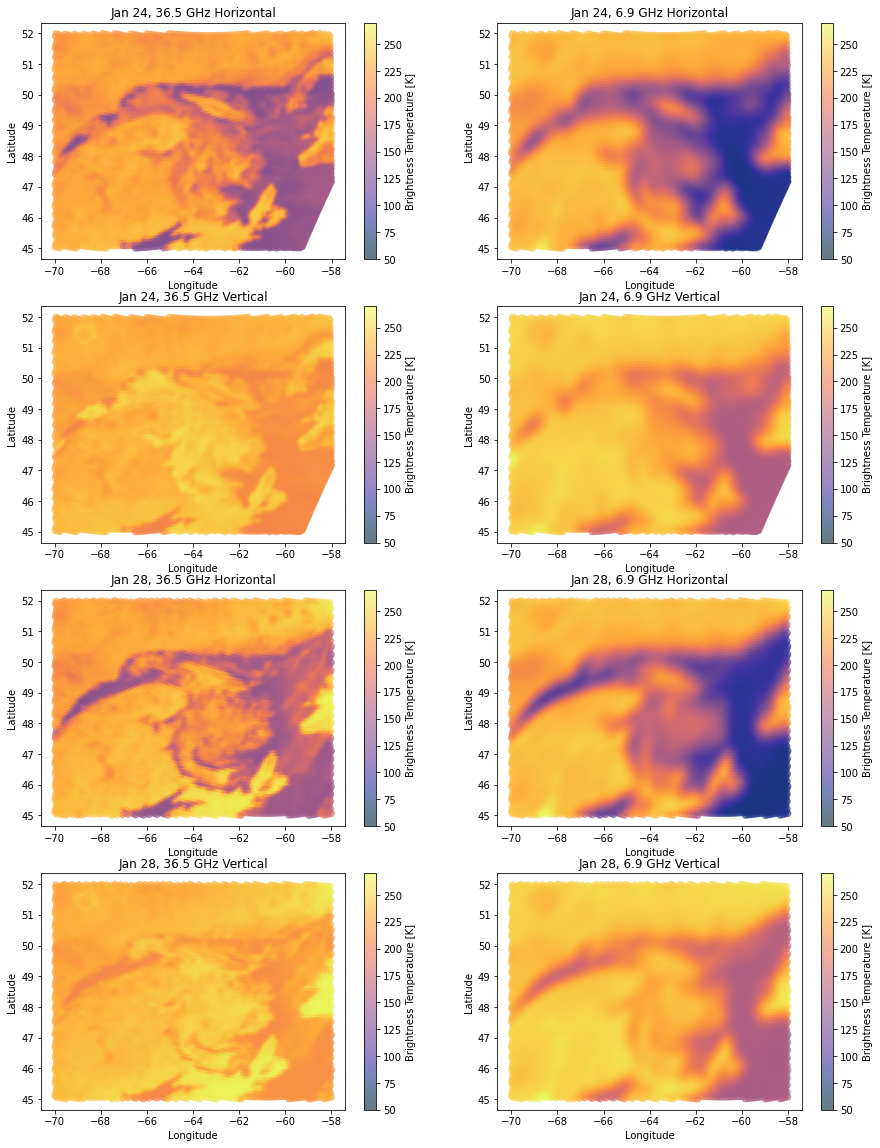

In [8]:
fig, ax = plt.subplots(4,2, figsize = (15,20))
C = ax[0,0].scatter(df24.lon,df24.lat,c=df24.H36, cmap = cm.cm.thermal, alpha=0.6, vmin=50, vmax=270)
plt.colorbar(C, ax=ax[0,0], label='Brightness Temperature [K]')
ax[0,0].set_ylabel('Latitude')
ax[0,0].set_xlabel('Longitude')
ax[0,0].set_title('Jan 24, 36.5 GHz Horizontal')

C = ax[0,1].scatter(df24.lon,df24.lat,c=df24.H6, cmap = cm.cm.thermal, alpha=0.6, vmin=50, vmax=270)
plt.colorbar(C, ax=ax[0,1], label='Brightness Temperature [K]')
ax[0,1].set_ylabel('Latitude')
ax[0,1].set_xlabel('Longitude')
ax[0,1].set_title('Jan 24, 6.9 GHz Horizontal')

C = ax[1,0].scatter(df24.lon,df24.lat,c=df24.V36, cmap = cm.cm.thermal, alpha=0.6, vmin=50, vmax=270)
plt.colorbar(C, ax=ax[1,0], label='Brightness Temperature [K]')
ax[1,0].set_ylabel('Latitude')
ax[1,0].set_xlabel('Longitude')
ax[1,0].set_title('Jan 24, 36.5 GHz Vertical')

C = ax[1,1].scatter(df24.lon,df24.lat,c=df24.V6, cmap = cm.cm.thermal, alpha=0.6, vmin=50, vmax=270)
plt.colorbar(C, ax=ax[1,1], label='Brightness Temperature [K]')
ax[1,1].set_ylabel('Latitude')
ax[1,1].set_xlabel('Longitude')
ax[1,1].set_title('Jan 24, 6.9 GHz Vertical')

C = ax[2,0].scatter(df28.lon,df28.lat,c=df28.H36, cmap = cm.cm.thermal, alpha=0.6, vmin=50, vmax=270)
plt.colorbar(C, ax=ax[2,0], label='Brightness Temperature [K]')
ax[2,0].set_ylabel('Latitude')
ax[2,0].set_xlabel('Longitude')
ax[2,0].set_title('Jan 28, 36.5 GHz Horizontal')

C = ax[2,1].scatter(df28.lon,df28.lat,c=df28.H6, cmap = cm.cm.thermal, alpha=0.6, vmin=50, vmax=270)
plt.colorbar(C, ax=ax[2,1], label='Brightness Temperature [K]')
ax[2,1].set_ylabel('Latitude')
ax[2,1].set_xlabel('Longitude')
ax[2,1].set_title('Jan 28, 6.9 GHz Horizontal')

C = ax[3,0].scatter(df28.lon,df28.lat,c=df28.V36, cmap = cm.cm.thermal, alpha=0.6, vmin=50, vmax=270)
plt.colorbar(C, ax=ax[3,0], label='Brightness Temperature [K]')
ax[3,0].set_ylabel('Latitude')
ax[3,0].set_xlabel('Longitude')
ax[3,0].set_title('Jan 28, 36.5 GHz Vertical')

C = ax[3,1].scatter(df28.lon,df28.lat,c=df28.V6, cmap = cm.cm.thermal, alpha=0.6, vmin=50, vmax=270)
plt.colorbar(C, ax=ax[3,1], label='Brightness Temperature [K]')
ax[3,1].set_ylabel('Latitude')
ax[3,1].set_xlabel('Longitude')
ax[3,1].set_title('Jan 28, 6.9 GHz Vertical')

# Question 3

Text(0.5, 1.0, 'Jan 28, 6.9 GHz Vertical')

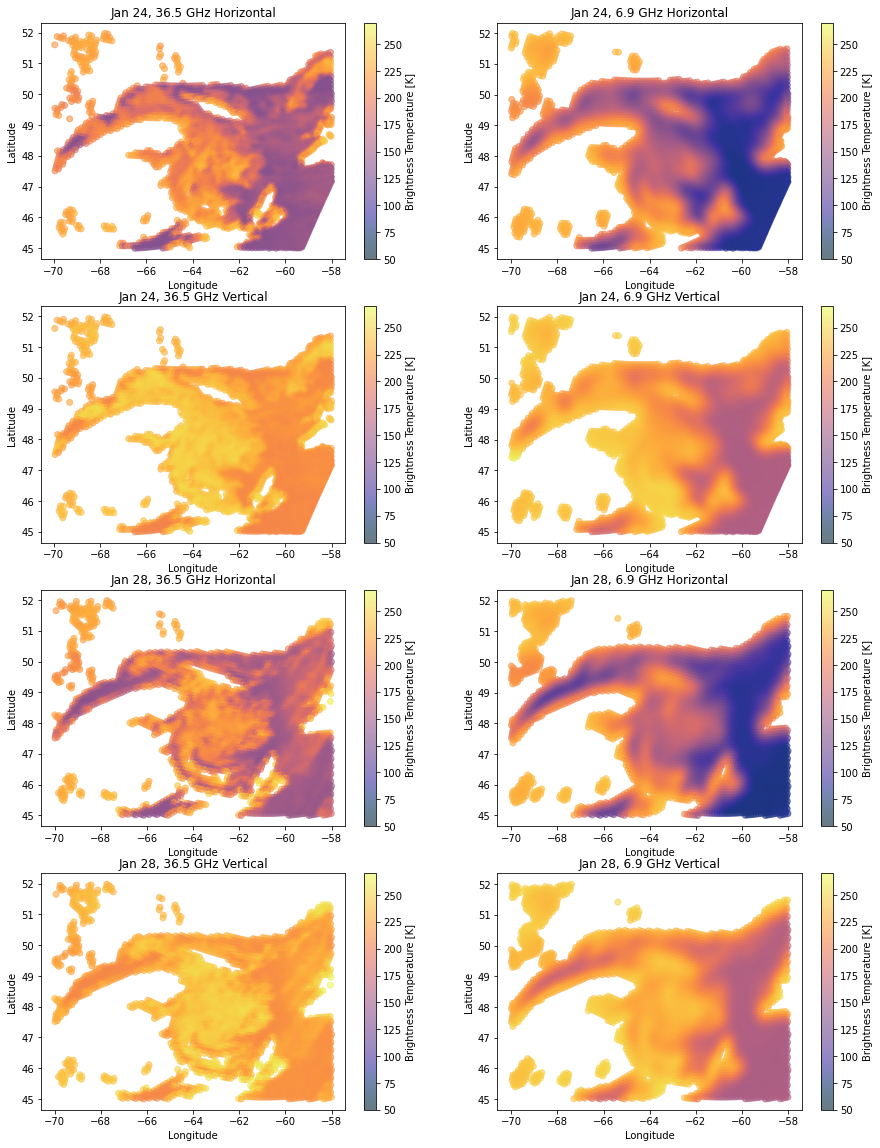

In [9]:
[df24.land36<95]

fig, ax = plt.subplots(4,2, figsize = (15,20))
C = ax[0,0].scatter(df24.lon[df24.land36<95],df24.lat[df24.land36<95],c=df24.H36[df24.land36<95], cmap = cm.cm.thermal, alpha=0.6, vmin=50, vmax=270)
plt.colorbar(C, ax=ax[0,0], label='Brightness Temperature [K]')
ax[0,0].set_ylabel('Latitude')
ax[0,0].set_xlabel('Longitude')
ax[0,0].set_title('Jan 24, 36.5 GHz Horizontal')

C = ax[0,1].scatter(df24.lon[df24.land6<95],df24.lat[df24.land6<95],c=df24[df24.land6<95].H6, cmap = cm.cm.thermal, alpha=0.6, vmin=50, vmax=270)
plt.colorbar(C, ax=ax[0,1], label='Brightness Temperature [K]')
ax[0,1].set_ylabel('Latitude')
ax[0,1].set_xlabel('Longitude')
ax[0,1].set_title('Jan 24, 6.9 GHz Horizontal')

C = ax[1,0].scatter(df24.lon[df24.land36<95],df24.lat[df24.land36<95],c=df24.V36[df24.land36<95], cmap = cm.cm.thermal, alpha=0.6, vmin=50, vmax=270)
plt.colorbar(C, ax=ax[1,0], label='Brightness Temperature [K]')
ax[1,0].set_ylabel('Latitude')
ax[1,0].set_xlabel('Longitude')
ax[1,0].set_title('Jan 24, 36.5 GHz Vertical')

C = ax[1,1].scatter(df24.lon[df24.land6<95],df24.lat[df24.land6<95],c=df24.V6[df24.land6<95], cmap = cm.cm.thermal, alpha=0.6, vmin=50, vmax=270)
plt.colorbar(C, ax=ax[1,1], label='Brightness Temperature [K]')
ax[1,1].set_ylabel('Latitude')
ax[1,1].set_xlabel('Longitude')
ax[1,1].set_title('Jan 24, 6.9 GHz Vertical')

C = ax[2,0].scatter(df28.lon[df28.land36<95],df28.lat[df28.land36<95],c=df28.H36[df28.land36<95], cmap = cm.cm.thermal, alpha=0.6, vmin=50, vmax=270)
plt.colorbar(C, ax=ax[2,0], label='Brightness Temperature [K]')
ax[2,0].set_ylabel('Latitude')
ax[2,0].set_xlabel('Longitude')
ax[2,0].set_title('Jan 28, 36.5 GHz Horizontal')

C = ax[2,1].scatter(df28.lon[df28.land6<95],df28.lat[df28.land6<95],c=df28.H6[df28.land6<95], cmap = cm.cm.thermal, alpha=0.6, vmin=50, vmax=270)
plt.colorbar(C, ax=ax[2,1], label='Brightness Temperature [K]')
ax[2,1].set_ylabel('Latitude')
ax[2,1].set_xlabel('Longitude')
ax[2,1].set_title('Jan 28, 6.9 GHz Horizontal')

C = ax[3,0].scatter(df28.lon[df28.land36<95],df28.lat[df28.land36<95],c=df28.V36[df28.land36<95], cmap = cm.cm.thermal, alpha=0.6, vmin=50, vmax=270)
plt.colorbar(C, ax=ax[3,0], label='Brightness Temperature [K]')
ax[3,0].set_ylabel('Latitude')
ax[3,0].set_xlabel('Longitude')
ax[3,0].set_title('Jan 28, 36.5 GHz Vertical')

C = ax[3,1].scatter(df28.lon[df28.land6<95],df28.lat[df28.land6<95],c=df28.V6[df28.land6<95], cmap = cm.cm.thermal, alpha=0.6, vmin=50, vmax=270)
plt.colorbar(C, ax=ax[3,1], label='Brightness Temperature [K]')
ax[3,1].set_ylabel('Latitude')
ax[3,1].set_xlabel('Longitude')
ax[3,1].set_title('Jan 28, 6.9 GHz Vertical')

#### Based on these spatial maps, which frequencies and/or polarizations would seem most suitable for sea ice concentration retrieval and why?

Based on the plots I beleive that 36.5 GHz horizontal is the most suitable choice for sea ice concentration retrieval. First off, the native resolution of this frequency (36.5) is higher than that of the 6.9 GHz frequency, so it results in a more detailed picture of the variations in brightness temperature in this region. In the choice between vertical or horizontal, I would choose horizontal as the difference in brightness temperature between the open water and the ice is the most pronounced in these maps. 

# Question 4

Text(0.5, 0, '37V')

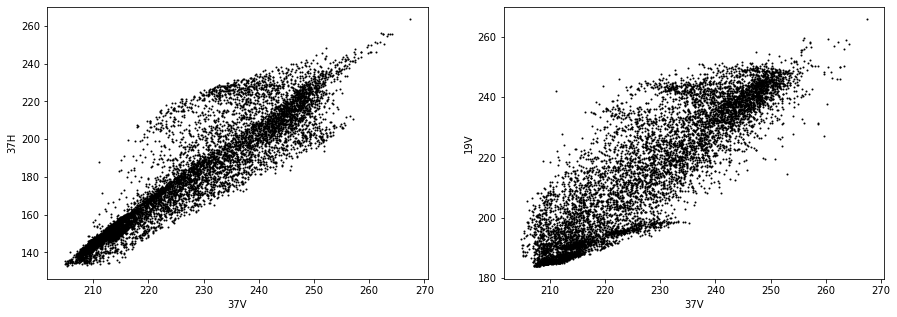

In [10]:
# both days(assuming still want land removed)
fig, ax = plt.subplots(1,2, figsize = (15,5))
ax[0].scatter(np.append(df24.V36[df24.land36<95],df28.V36[df28.land36<95]), np.append(df24.H36[df24.land36<95],df28.H36[df28.land36<95]), c='k', s=1)
ax[0].set_ylabel('37H')
ax[0].set_xlabel('37V')

ax[1].scatter(np.append(df24.V36[df24.land36<95],df28.V36[df28.land36<95]), np.append(df24.V19[df24.land36<95],df28.V19[df28.land36<95]), c='k', s=1)
ax[1].set_ylabel('19V')
ax[1].set_xlabel('37V')

#### Comment on which variable combinations might be useful for sea ice concentration retrieval and why.
Higher resolutions are useful for sea-ice concentration retrieval due to their ability to observe smaller spatial changes. Although the 85 GHz channel has a higher resolution than the 36.5 GHz channel, it is very sensitive to atmospheric and surface effects and so it is not an appropriate choice. Thus the 36.5 GHz channel is prefered. As shown in the above left figure the 36.5 horizontal and 36.5 vertical channels have a distinct linear correlation (thick black linear region) and thus a relationship for calcualting the sea-ice contration using these two could be easily calculated. This is consistent with Comiso (1997), where it is stated that these channels have the highest correlation of the the channels in arctic regions (although the Gulf of Saint Lawrence is not quite north enough to be considered arctic the values still correlate quite well). The vertical 18.7 GHz and 36.5 GHz channels were also compared as they were noted to be the closest to observed values in Comiso (1997). Like the results from said paper, this scatter plot (above right) is less clear than the scatter plot to the left, so the 36.5 GHz vertical and horizontal comparison is still likely more useful. 

#### Does the distribution of your points look similar to those in Comiso (Fig 3)?
The distribution of the points in my scatter plots to not have as strong of a V-like shape as those in Comiso (1997), the data is more variable and more of the points seem to fit in to the "open water" area of the plot than the "ice" region, while in said paper the distribution between these two groups seemed similar. This difference in results may be because of the following: <br>
- The arctic region where Comiso (1997)'s analysis was conducted is likely more ice-covered, and by thicker ice, than the Gulf of Saint Lawrence
- The presence of snow on top of ice perhaps has an impact
- The presence of landfast ice in the region of the Gulf of Saint Lawrence versus 'pure' sea-ice 
- The data anlyised in this distribution has not been corrected for land overlap effect

# Question 5

Text(0.5, 1.0, 'Horizontal 36.5 GHz')

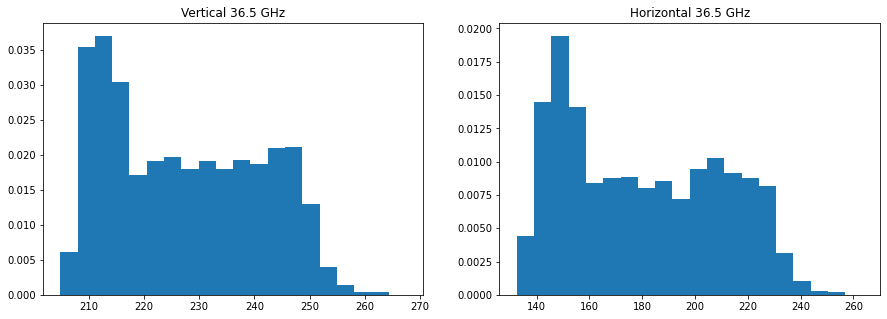

In [11]:
fig, ax = plt.subplots(1,2, figsize = (15,5))
V36 = ax[0].hist(np.append(df24.V36[df24.land36<95],df28.V36[df28.land36<95]),bins=20, density = True)
ax[0].set_title('Vertical 36.5 GHz')

H36 = ax[1].hist(np.append(df24.H36[df24.land36<95],df28.H36[df28.land36<95]),bins=20, density = True)
ax[1].set_title('Horizontal 36.5 GHz')

# V19 = ax[1,0].hist(np.append(df24.V19[df24.land19<95],df28.V19[df28.land19<95]),bins=100)
# ax[1,0].set_title('Vertical 18.7 GHz')

# H19 = ax[1,1].hist(np.append(df24.H19[df24.land19<95],df28.H19[df28.land19<95]),bins=100)
# ax[1,1].set_title('Horizontal 18.7 GHz')

(120.0, 270.0)

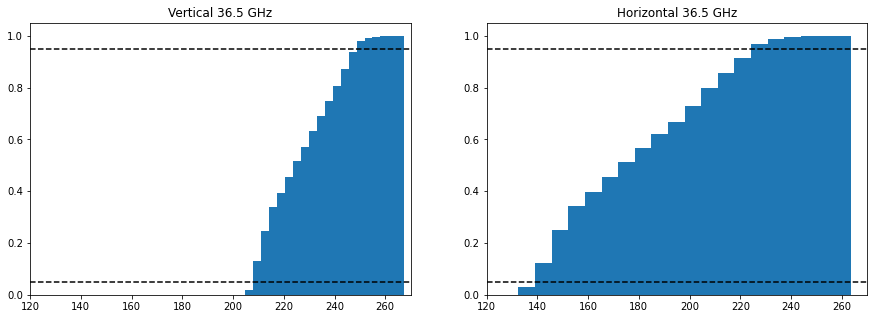

In [12]:
fig, ax = plt.subplots(1,2, figsize = (15,5))
V36 = ax[0].hist(np.append(df24.V36[df24.land36<95],df28.V36[df28.land36<95]),bins=20, density = True, cumulative=True)
ax[0].set_title('Vertical 36.5 GHz')

H36 = ax[1].hist(np.append(df24.H36[df24.land36<95],df28.H36[df28.land36<95]),bins=20, density = True, cumulative=True)
ax[1].set_title('Horizontal 36.5 GHz')

ax[0].plot([120,280],[0.05,0.05],'k--')
ax[1].plot([120,280],[0.05,0.05],'k--')
ax[0].plot([120,280],[0.95,0.95],'k--')
ax[1].plot([120,280],[0.95,0.95],'k--')
ax[0].set_xlim([120,270])
ax[1].set_xlim([120,270])

In [13]:
# interpolate between the values of both cumulative 
def interp(a,b,c,A,C):
    B = -1*(((a-b)*(C-A))/(c-a))+A
    return B

In [14]:
# ice end members
waterH = interp(H36[0][0],0.05,H36[0][1],H36[1][0],H36[1][1])
waterV = interp(V36[0][0],0.05,V36[0][1],V36[1][0],V36[1][1])

In [15]:
# water end members
iceH = interp(H36[0][-7],0.95,H36[0][-6],H36[1][-7],H36[1][-6])
iceV = interp(V36[0][-7],0.95,V36[0][-6],V36[1][-7],V36[1][-6])

In [16]:
# make function for calcualting the sea-ice concentration
def conc(TB,Tw,Ti):
    C = (TB-Tw)/(Ti-Tw)
    return C

Text(0.5, 1.0, 'Jan 28, 36.5 GHz Horizontal')

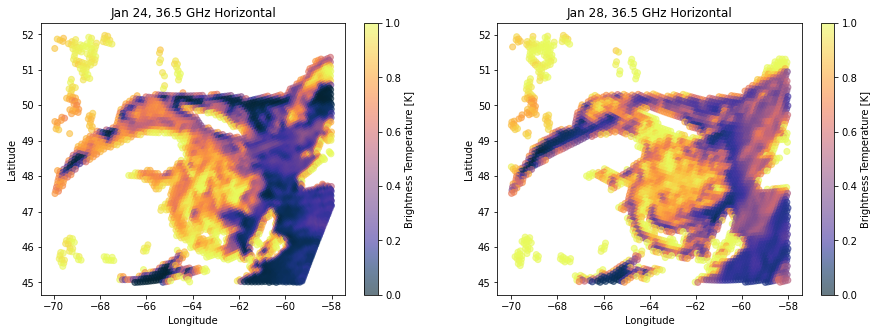

In [17]:
# calculation and plot for 36.5 GHz horizontal 
ice_conc24 = conc(df24.H36[df24.land36<95],waterH,iceH)
ice_conc28 = conc(df28.H36[df28.land36<95],waterH,iceH)

fig, ax = plt.subplots(1,2, figsize = (15,5))
C = ax[0].scatter(df24.lon[df24.land36<95],df24.lat[df24.land36<95],c=ice_conc24, cmap = cm.cm.thermal, alpha=0.6, vmin=0, vmax=1)
plt.colorbar(C, ax=ax[0], label='Brightness Temperature [K]')
ax[0].set_ylabel('Latitude')
ax[0].set_xlabel('Longitude')
ax[0].set_title('Jan 24, 36.5 GHz Horizontal')

C = ax[1].scatter(df28.lon[df28.land36<95],df28.lat[df28.land36<95],c=ice_conc28, cmap = cm.cm.thermal, alpha=0.6, vmin=0, vmax=1)
plt.colorbar(C, ax=ax[1], label='Brightness Temperature [K]')
ax[1].set_ylabel('Latitude')
ax[1].set_xlabel('Longitude')
ax[1].set_title('Jan 28, 36.5 GHz Horizontal')

Text(0.5, 1.0, 'Jan 28, 36.5 GHz Vertical')

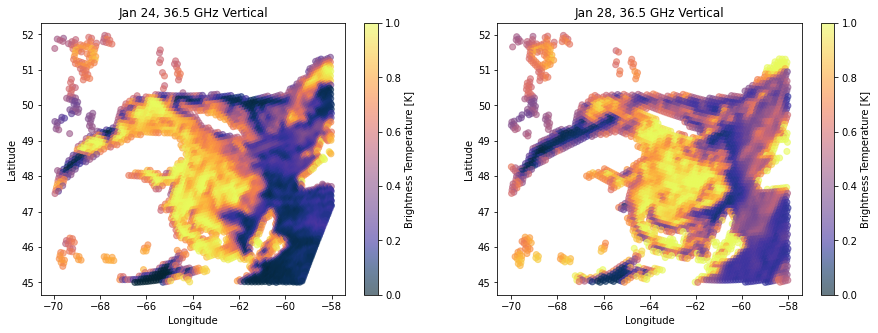

In [18]:
# calculation and plot for 36.5 GHz vertical
ice_conc24 = conc(df24.V36[df24.land36<95],waterV,iceV)
ice_conc28 = conc(df28.V36[df28.land36<95],waterV,iceV)

fig, ax = plt.subplots(1,2, figsize = (15,5))
C = ax[0].scatter(df24.lon[df24.land36<95],df24.lat[df24.land36<95],c=ice_conc24, cmap = cm.cm.thermal, alpha=0.6, vmin=0, vmax=1)
plt.colorbar(C, ax=ax[0], label='Brightness Temperature [K]')
ax[0].set_ylabel('Latitude')
ax[0].set_xlabel('Longitude')
ax[0].set_title('Jan 24, 36.5 GHz Vertical')

C = ax[1].scatter(df28.lon[df28.land36<95],df28.lat[df28.land36<95],c=ice_conc28, cmap = cm.cm.thermal, alpha=0.6, vmin=0, vmax=1)
plt.colorbar(C, ax=ax[1], label='Brightness Temperature [K]')
ax[1].set_ylabel('Latitude')
ax[1].set_xlabel('Longitude')
ax[1].set_title('Jan 28, 36.5 GHz Vertical')

Text(0.5, 1.0, 'Jan 28, 36.5 GHz Vertical - Horizontal')

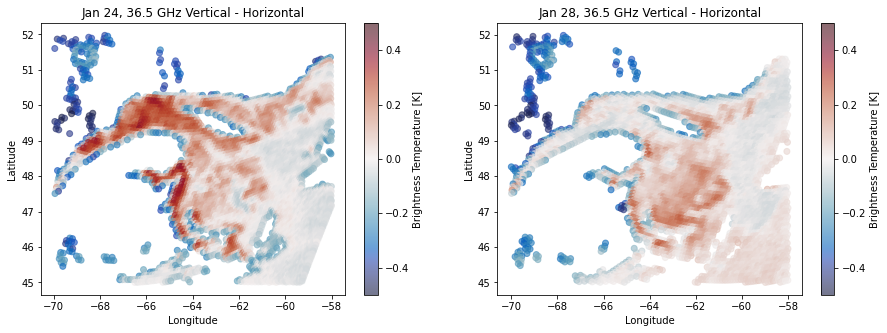

In [19]:
# difference between polarizations 
ver_hor24 = conc(df24.V36[df24.land36<95],waterV,iceV)-conc(df24.H36[df24.land36<95],waterH,iceH)
ver_hor28 = conc(df28.V36[df28.land36<95],waterV,iceV)-conc(df28.H36[df28.land36<95],waterH,iceH)

fig, ax = plt.subplots(1,2, figsize = (15,5))
C = ax[0].scatter(df24.lon[df24.land36<95],df24.lat[df24.land36<95],c=ver_hor24, cmap = cm.cm.balance, alpha=0.6, vmin=-0.5, vmax=0.5)
plt.colorbar(C, ax=ax[0], label='Brightness Temperature [K]')
ax[0].set_ylabel('Latitude')
ax[0].set_xlabel('Longitude')
ax[0].set_title('Jan 24, 36.5 GHz Vertical - Horizontal')

C = ax[1].scatter(df28.lon[df28.land36<95],df28.lat[df28.land36<95],c=ver_hor28, cmap = cm.cm.balance, alpha=0.6, vmin=-0.5, vmax=0.5)
plt.colorbar(C, ax=ax[1], label='Brightness Temperature [K]')
ax[1].set_ylabel('Latitude')
ax[1].set_xlabel('Longitude')
ax[1].set_title('Jan 28, 36.5 GHz Vertical - Horizontal')

#### Comment on any differences between the estimates derived from different choices of frequency and/or polarization.
The estimates that I derived are different polarizations as opposed to frequencies. As shown in the above plots:<br>
- the Vertical polarization estimates a higher ice-concentration in regions with ice cover. The increase is more pronounced on January 24th with an increase of up to 50% in some areas (in particular within the Saint Lawrence)<br>
- Measurements that are laregely land come back as having a high ice-concentration in the horizontal result (close to 1) than in the vertical result (closer to 0.5)<br>
- Overal the vertical polarizations have a has a large ice extent and higher ice-concentration


# Question 6

In [20]:
mylist = [f for f in glob.glob("*fv2.0.nc")]
print(mylist)

['ESACCI-SEAICE-L4-SICONC-AMSR_25.0kmEASE2-NH-20140128-fv2.0.nc']


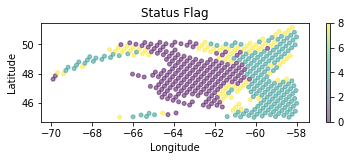

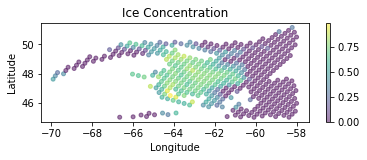

In [21]:
for k in range (len(mylist)):
    Data=xr.open_dataset(mylist[k])

 #define the variables
    lat_esa=np.asarray(Data.lat)
    lon_esa=np.asarray(Data.lon)
    ice_conc=np.asarray(Data.ice_conc.squeeze())
    total_error=np.asarray(Data.total_standard_error.squeeze())
    smearing_error=np.asarray(Data.smearing_standard_error.squeeze())
    algorithm_error=np.asarray(Data.algorithm_standard_error.squeeze())
    status_flag=np.asarray(Data.status_flag.squeeze())
 #define the GSL boundaries
    latmax=52
    latmin=45
    lonmax=-58
    lonmin=-70
    ikeep=0
 #set the variables used in the loop
    latk=[]
    lonk=[]
    ice_conck=[]
    total_errork=[]
    smearing_errork=[]
    algorithm_errork=[]
    status_flagk=[]

 # select the data based on specific criteria
    for i in range(len(lat_esa)):
        for j in range (len(lat_esa)):
            if (lat_esa[i,j] < latmax and lat_esa[i,j] > latmin
                and lon_esa[i,j] < lonmax and lon_esa[i,j] > lonmin
                and ice_conc[i,j] >= 0 and status_flag[i,j] != 1):
                    ikeep=ikeep+1
                    latk.append(lat_esa[i,j])
                    lonk.append(lon_esa[i,j])
                    ice_conck.append(ice_conc[i,j]/100)
                    total_errork.append(total_error[i,j])
                    smearing_errork.append(smearing_error[i,j]/100)
                    algorithm_errork.append(algorithm_error[i,j])
                    status_flagk.append(status_flag[i,j])
                    
    plt.subplot(211)
    plt.scatter(lonk,latk,4**2,status_flagk,alpha=0.5)
    plt.title("Status Flag")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.colorbar()
    plt.show()
    
    plt.subplot(212)
    plt.scatter(lonk,latk,4**2,ice_conck,alpha=0.5)
    plt.title("Ice Concentration")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.colorbar()
    plt.show()

#### Write a paragraph comparing this sea ice concentration to one of the ones you’ve estimated, commenting on any differences.
The server and estimated sea-ice concentration results are similar for January 28th in terms of the spatial distibution of ice versus water. However, a number of smaller differences can be observed. First, in my estimations with Saint Lawrence River has significant ice cover, while in the the server results only a small portion of the 'in river' region has ice, and for the most part even this is at a concetration of 0.50 or less. In general, all regions covered with ice in the server results have smaller concentrations than the same region in my estimations - my estimations go up to a concetration of 1 while all but one point goes up to 1 in the server estimate. In the estimation there appears to be a small, but not negligible, amount of ice in the open water portion on the east half of the spatial distribution, but in the server the concentration is 0 over the entire open water area.
 